In [1]:
from IPython.display import HTML
HTML('''<style>html, body{overflow-y: visible !important} .CodeMirror{min-width:105% !important;} .rise-enabled .CodeMirror, .rise-enabled .output_subarea{font-size:140%; line-height:1.2; overflow: visible;} .output_subarea pre{width:110%}</style>''') # For slides

# Foundations of Data Mining: Assignment 1

Please complete all assignments in this notebook. You should submit this notebook, as well as a PDF version (See File > Download as).

In [2]:
# Please fill in your names here
NAME_STUDENT_1 = "Wang Shihan"
NAME_STUDENT_2 = "Li Ye"

In [3]:
%matplotlib inline
from preamble import *
plt.rcParams['savefig.dpi'] = 100 # This controls the size of your figures
# Comment out and restart notebook if you only want the last output of each cell.
InteractiveShell.ast_node_interactivity = "all"

In [4]:
# Uncomment and run this to authenticate. Don't share your API key!
oml.config.apikey = os.environ.get('OPENMLKEY','6f1abcf47444085f31644c1cc675c57b')

In [5]:
import random
from sklearn.neighbors import (KNeighborsClassifier, KNeighborsRegressor)
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import (GridSearchCV, RandomizedSearchCV,
                                     ShuffleSplit, StratifiedKFold,
                                     cross_val_score, train_test_split,StratifiedShuffleSplit)
from sklearn import ensemble
from sklearn.ensemble import (RandomForestClassifier,
                              RandomForestRegressor,
                              GradientBoostingRegressor)
from sklearn.linear_model import (LogisticRegression, Lasso,
                                  Ridge, LinearRegression, ElasticNet)
from sklearn.svm import LinearSVC, SVR, SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
import time
from scipy.stats import expon
from sklearn.preprocessing import StandardScaler

## MoneyBall (5 points, 1+2+1+1)
In the early 2000s, 2 baseball scouts completely changed the game of baseball by analysing the available data about baseball players and hiring the best ones.
The [MoneyBall dataset](https://www.openml.org/d/41021) contains this data (click the link for more details). The goal is to accurately predict the number of 'runs' each player can score. 

In [6]:
moneyball = oml.datasets.get_dataset(41021) # Download MoneyBall data
# Get the predictors X and the target y
X, y, attribute_names = moneyball.get_data(target=moneyball.default_target_attribute, return_attribute_names=True)
# Describe the data with pandas, just to get an overview
ballframe = pd.DataFrame(X, columns=attribute_names)
ballframe['RS'] = y
ballframe.describe()

Team  League     Year       RA   ...           G    OOBP    OSLG  \
count  1232.00  1232.0  1232.00  1232.00   ...     1232.00  420.00  420.00   
mean     15.67     0.5  1988.96   715.08   ...        3.92    0.33    0.42   
std       9.72     0.5    14.82    93.08   ...        0.62    0.02    0.03   
min       0.00     0.0  1962.00   472.00   ...        0.00    0.29    0.35   
25%       7.00     0.0  1976.75   649.75   ...        4.00    0.32    0.40   
50%      16.00     0.5  1989.00   709.00   ...        4.00    0.33    0.42   
75%      23.00     1.0  2002.00   774.25   ...        4.00    0.34    0.44   
max      38.00     1.0  2012.00  1103.00   ...        7.00    0.38    0.50   

            RS  
count  1232.00  
mean    715.08  
std      91.53  
min     463.00  
25%     652.00  
50%     711.00  
75%     775.00  
max    1009.00  

[8 rows x 15 columns]

1 . Visually explore the data. Plot the distribution of each feature (e.g. histograms), as well as the target. Visualize the dependency of the target on each feature (use a 2d scatter plot). Is there anything that stands out? Is there something that you think might require special treatment?
- Feel free to create additional plots that help you understand the data
- Only visualize the data, you don't need to change it (yet)

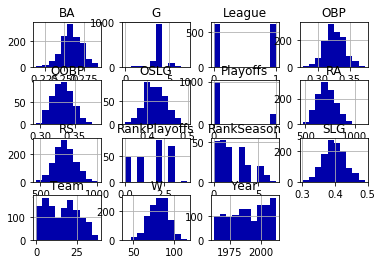

In [7]:
#histgram
p = ballframe.hist()

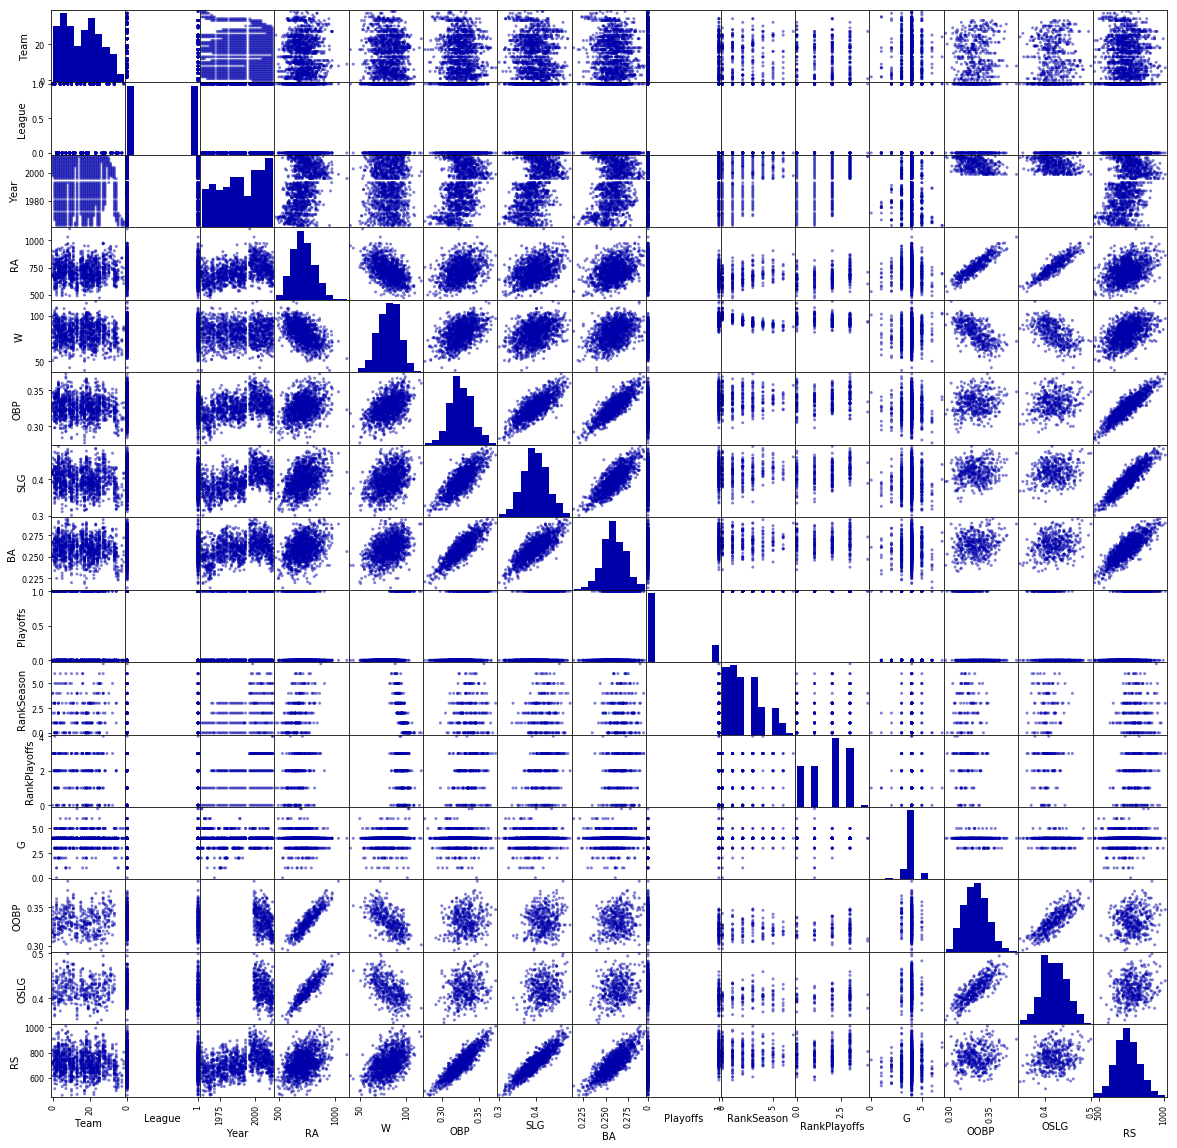

In [8]:
sm = pd.scatter_matrix(ballframe, figsize=(20, 20))

2 . Compare all linear regression algorithms that we covered in class (Linear Regression, Ridge, Lasso and ElasticNet), as well as kNN. Evaluate using cross-validation and the $R^2$ score, with the default parameters. Does scaling the data with StandardScaler help? Provide a concise but meaningful interpretation of the results.
- Preprocess the data as needed (e.g. are there nominal features that are not ordinal?). If you don't know how to proceed, remove the feature and continue.

In [7]:
np.isnan(X) 
np.isnan(y) 
np.where(np.isnan(X))
np.where(np.isnan(y))
X=np.nan_to_num(X)
y=np.nan_to_num(y)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False,  True,  True]])

array([False, False, False, ..., False, False, False])

(array([   0,    0,    3, ..., 1231, 1231, 1231]),
 array([ 9, 10,  9, ..., 10, 12, 13]))

(array([], dtype=int64),)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
print("Score: {:.2f}".format(lr.score(X_test, y_test) ))
print("Training set score (R^2): {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score (R^2): {:.2f}".format(lr.score(X_test, y_test)))
scores = cross_val_score(lr, X_train, y_train)
print("Cross-val Score: {:.2f}".format(scores.mean()))

Score: 0.95
Training set score (R^2): 0.95
Test set score (R^2): 0.95
Cross-val Score: 0.94


In [10]:
ridge = Ridge().fit(X_train, y_train)
print("Score: {:.2f}".format(ridge.score(X_test, y_test) ))
print("Training set score (R^2): {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score (R^2): {:.2f}".format(ridge.score(X_test, y_test)))
scores = cross_val_score(ridge, X_train, y_train)
print("Cross-val Score: {:.2f}".format(scores.mean()))

Score: 0.90
Training set score (R^2): 0.88
Test set score (R^2): 0.90
Cross-val Score: 0.87


In [11]:
lasso = Lasso().fit(X_train, y_train)
print("Score: {:.2f}".format(lasso.score(X_test, y_test) ))
print("Training set score (R^2): {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score (R^2): {:.2f}".format(lasso.score(X_test, y_test)))
scores = cross_val_score(lasso, X_train, y_train)
print("Cross-val Score: {:.2f}".format(scores.mean()))

Score: 0.87
Training set score (R^2): 0.85
Test set score (R^2): 0.87
Cross-val Score: 0.85


In [12]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
print("Score: {:.2f}".format(knn.score(X_test, y_test) ))
print("Training set score (R^2): {:.2f}".format(knn.score(X_train, y_train)))
print("Test set score (R^2): {:.2f}".format(knn.score(X_test, y_test)))
scores = cross_val_score(knn, X_train, y_train)
print("Cross-val Score: {:.2f}".format(scores.mean()))

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

Score: 0.73
Training set score (R^2): 0.85
Test set score (R^2): 0.73
Cross-val Score: 0.65


In [13]:
ela = ElasticNet(random_state=0)
ela.fit(X_train, y_train)
print(ela.coef_) 
print(ela.intercept_)
print("Score: {:.2f}".format(ela.score(X_test, y_test) ))
print("Training set score (R^2): {:.2f}".format(ela.score(X_train, y_train)))
print("Test set score (R^2): {:.2f}".format(ela.score(X_test, y_test)))
scores = cross_val_score(ela, X_train, y_train)
print("Cross-val Score: {:.2f}".format(scores.mean()))

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False)

[-0.145 -1.539  0.271  0.866  7.777  0.     0.     0.     0.     0.68
  0.196 -0.     0.     0.   ]
-1069.8177
Score: 0.87
Training set score (R^2): 0.85
Test set score (R^2): 0.87
Cross-val Score: 0.85


In [16]:
#Test with scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [17]:
lr = LinearRegression().fit(X_train_scaled, y_train)
print("Score: {:.2f}".format(lr.score(X_test_scaled, y_test) ))
print("Training set score (R^2): {:.2f}".format(lr.score(X_train_scaled, y_train)))
print("Test set score (R^2): {:.2f}".format(lr.score(X_test_scaled, y_test)))
scores = cross_val_score(lr, X_train_scaled, y_train)
print("Cross-val Score: {:.2f}".format(scores.mean()))

Score: 0.95
Training set score (R^2): 0.95
Test set score (R^2): 0.95
Cross-val Score: 0.94


In [18]:
ridge = Ridge().fit(X_train_scaled, y_train)
print("Score: {:.2f}".format(ridge.score(X_test_scaled, y_test) ))
print("Training set score (R^2): {:.2f}".format(ridge.score(X_train_scaled, y_train)))
print("Test set score (R^2): {:.2f}".format(ridge.score(X_test_scaled, y_test)))
scores = cross_val_score(ridge, X_train_scaled, y_train)
print("Cross-val Score: {:.2f}".format(scores.mean()))

Score: 0.95
Training set score (R^2): 0.95
Test set score (R^2): 0.95
Cross-val Score: 0.94


In [19]:
lasso = Lasso().fit(X_train_scaled, y_train)
print("Score: {:.2f}".format(lasso.score(X_test_scaled, y_test) ))
print("Training set score (R^2): {:.2f}".format(lasso.score(X_train_scaled, y_train)))
print("Test set score (R^2): {:.2f}".format(lasso.score(X_test_scaled, y_test)))
scores = cross_val_score(lasso, X_train_scaled, y_train)
print("Cross-val Score: {:.2f}".format(scores.mean()))

Score: 0.95
Training set score (R^2): 0.95
Test set score (R^2): 0.95
Cross-val Score: 0.94


In [20]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
print("Score: {:.2f}".format(knn.score(X_test_scaled, y_test) ))
print("Training set score (R^2): {:.2f}".format(knn.score(X_train_scaled, y_train)))
print("Test set score (R^2): {:.2f}".format(knn.score(X_test_scaled, y_test)))
scores = cross_val_score(knn, X_train_scaled, y_train)
print("Cross-val Score: {:.2f}".format(scores.mean()))

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

Score: 0.85
Training set score (R^2): 0.93
Test set score (R^2): 0.85
Cross-val Score: 0.84


In [21]:
ela = ElasticNet(random_state=0)
ela.fit(X_train_scaled, y_train)
print("Score: {:.2f}".format(ela.score(X_test_scaled, y_test) ))
print("Training set score (R^2): {:.2f}".format(ela.score(X_train_scaled, y_train)))
print("Test set score (R^2): {:.2f}".format(ela.score(X_test_scaled, y_test)))
scores = cross_val_score(ela, X_train_scaled, y_train)
print("Cross-val Score: {:.2f}".format(scores.mean()))

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False)

Score: 0.91
Training set score (R^2): 0.91
Test set score (R^2): 0.91
Cross-val Score: 0.90


In this case, scaling data helps, the socres are higher

3 . Do a default, shuffled train-test split and optimize the linear models for the degree of regularization ($alpha$) and choice of penalty (L1/L2). For Ridge and  Lasso, plot a curve showing the effect of the training and test set performance ($R^2$) while increasing the degree of regularization for different penalties. For ElasticNet, plot a heatmap $alpha \times l1\_ratio \rightarrow R^2$ using test set performance.
Report the optimal performance. Again, provide a concise but meaningful interpretation. What does the regularization do? Can you get better results?
- Think about how you get the L1/L2 loss. This is not a hyperparameter in regression.
- We've seen how to generate such heatmaps in Lecture 3.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)

Ridge Training set score: 0.92
Lasso Training set score: 0.93
Lasso Number of features used: 12
Ridge Training set score: 0.90
Lasso Training set score: 0.90
Lasso Number of features used: 9
Ridge Training set score: 0.89
Lasso Training set score: 0.86
Lasso Number of features used: 8
Ridge Training set score: 0.88
Lasso Training set score: 0.85
Lasso Number of features used: 6
Ridge Training set score: 0.87
Lasso Training set score: 0.86
Lasso Number of features used: 6
Ridge Training set score: 0.88
Lasso Training set score: 0.85
Lasso Number of features used: 6
Ridge Training set score: 0.87
Lasso Training set score: 0.85
Lasso Number of features used: 6
Ridge Training set score: 0.87
Lasso Training set score: 0.85
Lasso Number of features used: 6
Ridge Training set score: 0.87
Lasso Training set score: 0.85
Lasso Number of features used: 6


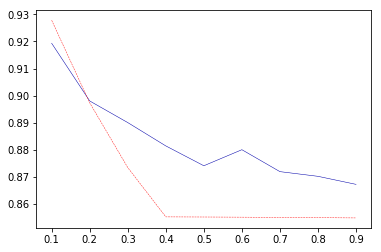

In [23]:
#Ridge and lasso
arange = np.arange(0.1,1.0,0.1)
rtrain_score=[]
rtest_score=[]
ltrain_score=[]
ltest_score=[]
for a in arange:
    #ridge
    ridge = Ridge(alpha=a).fit(X_train, y_train)
    ridge_scores = cross_val_score(ridge, X_train, y_train, cv=shuffle_split)
    print("Ridge Training set score: {:.2f}".format(np.mean(ridge_scores)))
    rtrain_score.append(np.mean(ridge_scores))
    #lasso
    lasso = Lasso(alpha=a).fit(X_train, y_train)
    lasso_scores = cross_val_score(lasso, X_train, y_train, cv=shuffle_split)
    print("Lasso Training set score: {:.2f}".format(np.mean(lasso_scores)))
    print("Lasso Number of features used: {}".format(np.sum(lasso.coef_ != 0)))
    ltrain_score.append(lasso.score(X_train, y_train))
plt.plot(arange,rtrain_score)
plt.plot(arange,ltrain_score)

We see when alpha=0.1, the models have best score.

In [24]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
              'l1_ratio': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'alpha': [0.001, 0.01, 0.1, 1, 10, 100], 'l1_ratio': [0.001, 0.01, 0.1, 1, 10, 100]}


In [29]:
ela = GridSearchCV(ElasticNet(), param_grid, cv=shuffle_split)
#X_train, X_test, y_train, y_test = train_test_split(
#        X, y, random_state=0)
ela.fit(X_train, y_train)
ela_score = ela.score(X_test, y_test)
results = pd.DataFrame(ela.cv_results_)
display(results.head())
scores = np.array(results.mean_test_score).reshape(6,6)
print("Best parameters: {}".format(ela.best_params_))
print("Best cross-validation score: {:.2f}".format(ela.best_score_))
print("Best estimator:\n{}".format(ela.best_estimator_))

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=None, test_size=0.5, train_size=0.5),
       error_score='raise',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100], 'l1_ratio': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       4.84e-03         4.30e-04         8.82e-01          8.85e-01   
1       4.87e-03         4.30e-04         8.82e-01          8.86e-01   
2       2.51e-03         3.18e-04         8.84e-01          8.88e-01   
3       3.98e-03         3.70e-04         9.45e-01          9.47e-01   
4       3.41e-03         3.74e-04        -5.50e-03         -3.88e-14   

        ...        std_fit_time std_score_time std_test_score  std_train_score  
0       ...            3.94e-04       6.82e-05       4.69e-03         3.64e-03  
1       ...            1.00e-03       1.18e-04       4.69e-03         3.63e-03  
2       ...            1.38e-03       4.28e-05       4.62e-03         3.55e-03  
3       ...            2.71e-03       9.86e-05       1.66e-03         2.03e-03  
4       ...            6.74e-04       9.36e-05       6.62e-03         3.38e-14  

[5 rows x 32 columns]

Best parameters: {'alpha': 0.001, 'l1_ratio': 1}
Best cross-validation score: 0.95
Best estimator:
ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=1,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


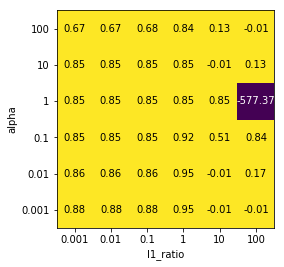

In [31]:
# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='l1_ratio', xticklabels=param_grid['l1_ratio'],
                      ylabel='alpha', yticklabels=param_grid['alpha'], cmap="viridis");

The regularization used to simplier the model, so for ElasticNet when alpha= 0.001 and l1_ratio=1 is the best parameters
Compare to the scalied scores of q2, results does not goes well.

4 . Visualize the coefficients of the optimized models. Do they agree on which features are
important? Compare the results with the feature importances returned by a RandomForest. Does it agree with the linear models? What would look for when scouting for a baseball player?

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [32]:
ridge = Ridge(alpha=0.1).fit(X_train, y_train)
print("Weights Ridge (coefficients): {}".format(ridge.coef_))
print("Bias Ridge (intercept): {}".format(ridge.intercept_))

Weights Ridge (coefficients): [  0.444  -2.155  -3.829  23.767  27.255  32.28   41.554  -2.129   2.268
  -2.484   1.218   2.925 -16.03   14.103]
Bias Ridge (intercept): 714.1607055664062


In [33]:
lasso = Lasso(alpha=0.1).fit(X_train, y_train)
print("Weights Lasso (coefficients): {}".format(lasso.coef_))
print("Bias Lasso (intercept): {}".format(lasso.intercept_))

Weights Lasso (coefficients): [  0.444  -2.155  -3.829  23.767  27.255  32.28   41.554  -2.129   2.268
  -2.484   1.218   2.925 -16.03   14.103]
Bias Lasso (intercept): 714.1607055664062


In [39]:
ela = ElasticNet(alpha=0.01, l1_ratio=1).fit(X_train, y_train)
print("Weights Lasso (coefficients): {}".format(ela.coef_))
print("Bias Lasso (intercept): {}".format(ela.intercept_))

Weights Lasso (coefficients): [   0.037   -4.36    -0.259    0.284    2.627 1875.231 1196.251    0.
    5.497   -2.058    1.605    4.497   -9.319   -0.   ]
Bias Lasso (intercept): -289.47088623046875


From coefficients we can see from both Ridge and lasso 1.218 has the closest value to 1.0, therefore feature 10 is the most imporatnt one. From ElasticNet we see even the coefficient value is 1.605 but feature 10 still the most closest to 1. So we conclude, all three model gave feature 10 as the most important feature.

In [22]:
forest = RandomForestClassifier(n_estimators=10, random_state=0) # Vary n_estimators
forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

Feature ranking:
1. feature 6 (0.125952)
2. feature 3 (0.124787)
3. feature 5 (0.120366)
4. feature 2 (0.113561)
5. feature 7 (0.109283)
6. feature 4 (0.104845)
7. feature 0 (0.104547)
8. feature 12 (0.042118)
9. feature 13 (0.041457)
10. feature 11 (0.040013)
11. feature 1 (0.033087)
12. feature 9 (0.016942)
13. feature 10 (0.013966)
14. feature 8 (0.009074)


In [40]:
print(attribute_names[6])
print(attribute_names[10])

SLG
RankPlayoffs


The most important feature is number 6 from Random forest, so it does not agree on the linear model. From linear model we can see it is important to look at Rankplayoffs, Win and Games played. From Random forest tree feature ranking we can see it is important to look at Slugging Percentage, Runs Allowed and On-Base Percentage.

## Nepalese character recognition (5 points, 1+2+2)
The [Devnagari-Script dataset](https://www.openml.org/d/40923) contains 92,000 images (32x32 pixels) of 46 characters from Devanagari script. Your goal is to learn to recognize the right letter given the image.

In [6]:
devnagari = oml.datasets.get_dataset(40923) # Download Devnagari data
# Get the predictors X and the labels y
X, y = devnagari.get_data(target=devnagari.default_target_attribute); 
classes = devnagari.retrieve_class_labels(target_name='character') # This one takes a while, skip if not needed

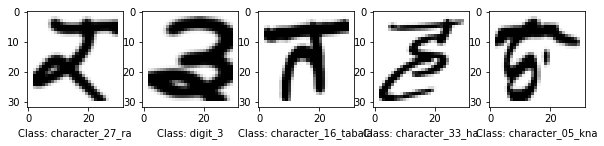

In [7]:
from random import randint
# Take some random examples, reshape to a 32x32 image and plot
fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
for i in range(5):
    n = randint(0,90000)
    axes[i].imshow(X[n].reshape(32, 32), cmap=plt.cm.gray_r)
    axes[i].set_xlabel("Class: %s" % (classes[y[n]]))
plt.show();

1. Evaluate k-Nearest Neighbors, Logistic Regression and RandomForests with their default settings.
    - Take a stratified 10% subsample of the data.
    - Use the default train-test split and predictive accuracy. Is predictive accuracy a good scoring measure for this problem?
    - Try to build the same models on increasingly large samples of the dataset (e.g. 10%, 20%,...). Plot the training time and the predictive performance for each. Stop when the training time becomes prohibitively large (this will be different for different models). 

k-Nearest Neighbors

Stratified is :0.1
X_train shape: (6900, 1024)
y_train shape: (6900,)
X_test shape: (2300, 1024)
y_test shape: (2300,)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
           weights='uniform')

Predictive accuracy is 0.7860869565217391
Time is :88.37966900000004
Stratified is :0.2
X_train shape: (13800, 1024)
y_train shape: (13800,)
X_test shape: (4600, 1024)
y_test shape: (4600,)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
           weights='uniform')

Predictive accuracy is 0.8297826086956521
Time is :356.526428
Stratified is :0.30000000000000004
X_train shape: (20700, 1024)
y_train shape: (20700,)
X_test shape: (6901, 1024)
y_test shape: (6901,)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
           weights='uniform')

Predictive accuracy is 0.8526300536154181
Time is :437.193299
Stratified is :0.4
X_train shape: (27600, 1024)
y_train shape: (27600,)
X_test shape: (9200, 1024)
y_test shape: (9200,)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
           weights='uniform')

Predictive accuracy is 0.8690217391304348
Time is :655.6157519999999


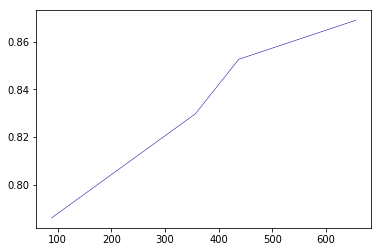

In [44]:
stratified = np.arange(0.1, 1.0, 0.1)
pre = []
t=[]
for s in stratified:
    print("Stratified is :" + str(s))
    X_index,y_index = next(StratifiedShuffleSplit(test_size=s, random_state=0).split(X,y))
    X_array,y_array=X[y_index],y[y_index]
#Use the default train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_array, y_array,random_state=0)
    print("X_train shape: {}".format(X_train.shape))
    print("y_train shape: {}".format(y_train.shape))
    print("X_test shape: {}".format(X_test.shape))
    print("y_test shape: {}".format(y_test.shape))
    knn = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
    ts=time.clock()
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test);
    print("Predictive accuracy is {}".format(
       accuracy_score(y_test, y_pred)
    ))
    te= time.clock()-ts
    print("Time is :"+ str(te))
    pre.append(accuracy_score(y_test, y_pred))
    t.append(te)
    if(te>600):
        break
plt.plot(t,pre)

We can see as the stratified percentage growth, the score increase, if we just look at the 10% subsample, the predictive score is not very well only 0.78

Logistic Regression

Stratified is :0.1
X_train shape: (6900, 1024)
y_train shape: (6900,)
X_test shape: (2300, 1024)
y_test shape: (2300,)
Training set score: 1.000
Test set score: 0.497
Time is :269.668698
Stratified is :0.11
X_train shape: (7590, 1024)
y_train shape: (7590,)
X_test shape: (2530, 1024)
y_test shape: (2530,)
Training set score: 1.000
Test set score: 0.474
Time is :359.13443299999994
Stratified is :0.12
X_train shape: (8280, 1024)
y_train shape: (8280,)
X_test shape: (2760, 1024)
y_test shape: (2760,)
Training set score: 1.000
Test set score: 0.462
Time is :483.3367770000001
Stratified is :0.13
X_train shape: (8970, 1024)
y_train shape: (8970,)
X_test shape: (2990, 1024)
y_test shape: (2990,)
Training set score: 1.000
Test set score: 0.464
Time is :737.7818809999999


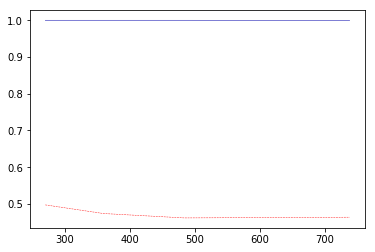

In [8]:
stratified = np.arange(0.1, 1.0, 0.01)
train_scores = []
test_scores = []
t=[]
for s in stratified:
    print("Stratified is :" + str(s))
    X_index,y_index = next(StratifiedShuffleSplit(test_size=s, random_state=0).split(X,y))
    X_array,y_array=X[y_index],y[y_index]
#Use the default train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_array, y_array,random_state=0)
    print("X_train shape: {}".format(X_train.shape))
    print("y_train shape: {}".format(y_train.shape))
    print("X_test shape: {}".format(X_test.shape))
    print("y_test shape: {}".format(y_test.shape))
    ts=time.clock()
    logreg = LogisticRegression(n_jobs=-1).fit(X_train, y_train)
    log_train_score = logreg.score(X_train, y_train)
    log_test_score = logreg.score(X_test, y_test)
    print("Training set score: {:.3f}".format(log_train_score))
    print("Test set score: {:.3f}".format(log_test_score))
    te= time.clock()-ts
    print("Time is :"+ str(te))
    train_scores.append(log_train_score)
    test_scores.append(log_test_score)
    t.append(te)
    if(te>600):
        break
plt.plot(t,train_scores)
plt.plot(t,test_scores)

LogisticRegression takes longer time, so we used smaller subsample. We can see the predictive score even worse in logisticRegression, if we just look at the 10% subsample, the predictive score is not very well only 0.497. The train score and test score are very different, we think it is not a good measure.

Random Forecast

Stratified is :0.1
X_train shape: (6900, 1024)
y_train shape: (6900,)
X_test shape: (2300, 1024)
y_test shape: (2300,)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

Training set score: 0.862
Test set score: 0.874
Time is :1.709791999999652
Stratified is :0.2
X_train shape: (13800, 1024)
y_train shape: (13800,)
X_test shape: (4600, 1024)
y_test shape: (4600,)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

Training set score: 0.726
Test set score: 0.726
Time is :3.444908999999825
Stratified is :0.30000000000000004
X_train shape: (20700, 1024)
y_train shape: (20700,)
X_test shape: (6901, 1024)
y_test shape: (6901,)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

Training set score: 0.547
Test set score: 0.552
Time is :5.380722999999762
Stratified is :0.4
X_train shape: (27600, 1024)
y_train shape: (27600,)
X_test shape: (9200, 1024)
y_test shape: (9200,)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

Training set score: 0.593
Test set score: 0.592
Time is :7.3345469999999295
Stratified is :0.5
X_train shape: (34500, 1024)
y_train shape: (34500,)
X_test shape: (11500, 1024)
y_test shape: (11500,)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

Training set score: 0.569
Test set score: 0.560
Time is :9.645916999999827
Stratified is :0.6
X_train shape: (41400, 1024)
y_train shape: (41400,)
X_test shape: (13800, 1024)
y_test shape: (13800,)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

Training set score: 0.547
Test set score: 0.555
Time is :12.54895600000009
Stratified is :0.7000000000000001
X_train shape: (48300, 1024)
y_train shape: (48300,)
X_test shape: (16101, 1024)
y_test shape: (16101,)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

Training set score: 0.520
Test set score: 0.522
Time is :14.4397170000002
Stratified is :0.8
X_train shape: (55200, 1024)
y_train shape: (55200,)
X_test shape: (18400, 1024)
y_test shape: (18400,)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

Training set score: 0.527
Test set score: 0.530
Time is :16.809155999999803
Stratified is :0.9
X_train shape: (62100, 1024)
y_train shape: (62100,)
X_test shape: (20700, 1024)
y_test shape: (20700,)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

Training set score: 0.520
Test set score: 0.519
Time is :18.611605000000054


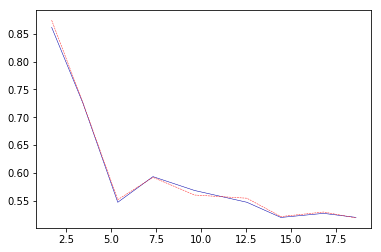

In [10]:
stratified = np.arange(0.1, 1.0, 0.1)
train_scores = []
test_scores = []
t=[]
for s in stratified:
    print("Stratified is :" + str(s))
    X_index,y_index = next(StratifiedShuffleSplit(test_size=s, random_state=0).split(X,y))
    X_array,y_array=X[y_index],y[y_index]
#Use the default train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_array, y_array,random_state=0)
    print("X_train shape: {}".format(X_train.shape))
    print("y_train shape: {}".format(y_train.shape))
    print("X_test shape: {}".format(X_test.shape))
    print("y_test shape: {}".format(y_test.shape))
    ts=time.clock()
    forest = RandomForestClassifier(n_estimators=10, random_state=0, n_jobs=-1)
    forest.fit(X_train, y_train)
    forest_train_score = logreg.score(X_train, y_train)
    forest_test_score = logreg.score(X_test, y_test)
    print("Training set score: {:.3f}".format(forest_train_score))
    print("Test set score: {:.3f}".format(forest_test_score))
    te= time.clock()-ts
    print("Time is :"+ str(te))
    train_scores.append(forest_train_score)
    test_scores.append(forest_test_score)
    t.append(te)
    if(te>600):
        break
plt.plot(t,train_scores)
plt.plot(t,test_scores)

We can see the randomforest has better score for 10% subsample, the train score and test score are very close to each other. Thus we think it is a good measure.

2 . Optimize the value for the number of neighbors $k$ (keep $k$ < 50) and the number of trees (keep $n\_estimators$ < 100) on the stratified 10% subsample.
- Use 10-fold crossvalidation and plot $k$ and $n\_estimators$ against the predictive accuracy. Which value of $k$, $n\_estimators$ should you pick?

In [11]:
#Take a stratified 10% subsample of the data.
X_index,y_index = next(StratifiedShuffleSplit(test_size=0.1, random_state=0).split(X,y))
X_array,y_array=X[y_index],y[y_index]
#Use the default train-test split
X_train, X_test, y_train, y_test = train_test_split(X_array, y_array,random_state=0)
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (6900, 1024)
y_train shape: (6900,)
X_test shape: (2300, 1024)
y_test shape: (2300,)


In [20]:
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 50)

# We can create Python dictionary using [] or dict()
scores = []
score_mean=[]
# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(cross_val_score(
        knn, X_train, y_train, n_jobs=-1, cv=10
    ))
    score_mean.append(np.mean(scores))
print(score_mean)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=12, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=14, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=16, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=17, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=18, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=19, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=21, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=22, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=23, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=24, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=25, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=26, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=27, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=28, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=29, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=31, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=32, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=33, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=34, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=35, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=36, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=37, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=38, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=39, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=40, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=41, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=42, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=43, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=44, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=45, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=46, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=47, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=48, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=49, p=2,
           weights='uniform')

[0.7553354464775603, 0.7271784706035204, 0.72565514804295, 0.7232974921759021, 0.7229042761326242, 0.721829076981962, 0.7212251411225084, 0.7202799299587795, 0.7194326618600415, 0.7186106843795502, 0.7178285437126962, 0.7167391462750613, 0.7153309422145531, 0.7138473219127831, 0.712512585922003, 0.7112014173230149, 0.7095757447853431, 0.7079985272112261, 0.7065874185161135, 0.7050986770294051, 0.7036907061587433, 0.7023576189417053, 0.7010667153690118, 0.6998236470622297, 0.6985877435489107, 0.6973475650241587, 0.6962262716254976, 0.6951328208885933, 0.6939854401403833, 0.6928642609954156, 0.6917774867149364, 0.6906391008809448, 0.6895856802309028, 0.6884958085573019, 0.6874228004295433, 0.6864048203841667, 0.6854331354074428, 0.6844969066874004, 0.6835565782091098, 0.6825869722562132, 0.6816731960708913, 0.6807162672544375, 0.6797591416856454, 0.6788128495228676, 0.6779146591581444, 0.6769857243219183, 0.6760815080971052, 0.6751461451878946, 0.6742369785008963]


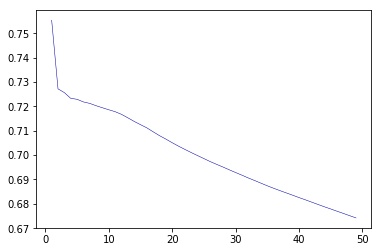

In [21]:
plt.plot(k_range,score_mean)

best knn with neighbour 1 as we can see in the graph

In [22]:
e_range = range(1, 100)
train_scores=[]
test_scores=[]
train_mean_scores=[]
test_mean_scores=[]
for e in e_range:
    forest = RandomForestClassifier(n_estimators=e, random_state=0) # Vary n_estimators
    forest.fit(X_train, y_train)
    train_scores.append(cross_val_score(
        forest, X_train, y_train, n_jobs=-1, cv=10
    ))
    train_mean_scores.append(np.mean(train_scores))
    test_scores.append(cross_val_score(
        forest, X_test, y_test, n_jobs=-1, cv=10
    ))  
    test_mean_scores.append(np.mean(test_scores))


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=3, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=4, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=6, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=7, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=8, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=11, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=12, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=13, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=14, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=16, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=17, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=18, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=19, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=21, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=22, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=23, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=24, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=26, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=27, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=28, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=29, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=31, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=32, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=33, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=34, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=35, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=36, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=37, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=38, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=39, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=41, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=42, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=43, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=44, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=45, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=46, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=47, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=48, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=49, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=51, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=52, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=53, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=54, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=55, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=56, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=57, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=58, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=59, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=61, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=62, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=63, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=64, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=65, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=66, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=67, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=68, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=69, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=71, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=72, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=73, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=74, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=75, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=76, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=77, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=78, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=79, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=81, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=82, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=83, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=84, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=85, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=86, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=87, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=88, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=89, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=90, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=91, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=92, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=93, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=94, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=95, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=96, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=97, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=98, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=99, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

[0.23261710621146792, 0.23532733747150542, 0.24947626944550386, 0.265140510066136, 0.28355727138699094, 0.30125437121070836, 0.317395145597401, 0.33235788229150454, 0.34548307303602827, 0.3573052964846347, 0.3682759541152451, 0.3784219307997821, 0.38771315065086664, 0.395714221370371, 0.4034577373270537, 0.41041202797068693, 0.4171374451433572, 0.4236273238116754, 0.4297768783273189, 0.4356717521633704, 0.4414803804946363, 0.44693457737171677, 0.4519892500605009, 0.45695336700330835, 0.46150989081462424, 0.4658507874997772, 0.46982642443595757, 0.47346452132708866, 0.4770421763053683, 0.4804625067361663, 0.48369326862329276, 0.48694709726747953, 0.4900992020791787, 0.4931774529549934, 0.49619405449861653, 0.49907515544477576, 0.5019782523255748, 0.5047545967811399, 0.5074628349130506, 0.5100045319385323, 0.5124639018113579, 0.5148569711036135, 0.517133227754922, 0.5193150313776614, 0.5214608211026295, 0.5235944451981887, 0.5256452268582651, 0.5276283782878983, 0.5295896612920071, 0.531

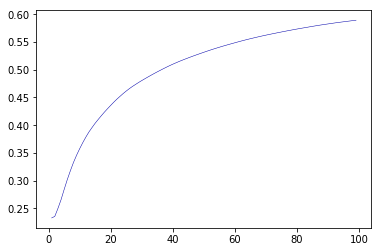

In [23]:
print(test_mean_scores)
plt.plot(e_range,test_mean_scores)

As we can see in graph, the best n_estimator is 99

# 3 . For the RandomForest, optimize both $n\_estimators$ and $max\_features$ at the same time on the entire dataset.
- Use a nested cross-validation and a random search over the possible values, and measure the accuracy. Explore how fine-grained this grid/random search can be, given your computational resources. What is the optimal performance you find?
- Hint: choose a nested cross-validation that is feasible. Don't use too many folds in the outer loop.
- Repeat the grid search and visualize the results as a plot (heatmap) $n\_estimators \times max\_features \rightarrow ACC$ with ACC visualized as the color of the data point. Try to make the grid as fine as possible. Interpret the results. Can you explain your observations? What did you learn about tuning RandomForests?

In [12]:
X_index,y_index = next(StratifiedShuffleSplit(test_size=0.05, random_state=0).split(X,y))
X_array,y_array=X[y_index],y[y_index]
#Use the default train-test split
X_train, X_test, y_train, y_test = train_test_split(X_array, y_array,random_state=0)

In [13]:
param_grid = {'n_estimators': [100, 200, 300, 400],
              'max_features': [0.001, 0.01, 0.1, 1]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'n_estimators': [100, 200, 300, 400], 'max_features': [0.001, 0.01, 0.1, 1]}


In [15]:
grid_search = GridSearchCV(RandomForestClassifier(n_jobs=-1), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100, 200, 300, 400], 'max_features': [0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Test set score: 0.72


In [16]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_features': 0.01, 'n_estimators': 300}
Best cross-validation score: 0.72


In [17]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Best estimator:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.01, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [18]:
results = pd.DataFrame(grid_search.cv_results_)
# Show the first 5 rows
display(results.head())

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0           1.65             0.34             0.63               1.0   
1           2.76             0.37             0.67               1.0   
2           4.25             0.41             0.69               1.0   
3           6.55             0.86             0.70               1.0   
4           3.35             0.15             0.68               1.0   

        ...        std_fit_time std_score_time std_test_score  std_train_score  
0       ...                0.43       1.28e-01           0.02              0.0  
1       ...                0.35       1.05e-01           0.02              0.0  
2       ...                0.39       8.03e-02           0.02              0.0  
3       ...                1.07       3.35e-01           0.02              0.0  
4       ...                0.26       3.81e-03           0.02              0.0  

[5 rows x 22 columns]

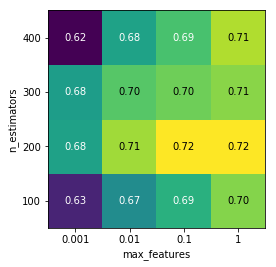

In [20]:
scores = np.array(results.mean_test_score).reshape(4, 4)
# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='max_features', xticklabels=param_grid['max_features'],
                      ylabel='n_estimators', yticklabels=param_grid['n_estimators'], cmap="viridis");

As we can see in the result, the best parameters is max_features=0.01 and n_estimators=300. Since the data size is large, we used 5% subsample to do the test. Compare to the RandomForest result in q2, we conclude as the n_esimator increases, the score increases because n_estimators means the number of trees. The more trees we have, the better average of trees is. Moreover, max_features also effect on the result. In q2 we used default for max_features, which is sqrt(n_features). In q3 we used float input. RandomForest can control overfitting. 

## 3. Understanding Ensembles (5 points (3+2))
Do a deeper analysis of how RandomForests and Gradient Boosting reduce their prediction error. We'll use the MAGIC telescope dataset (http://www.openml.org/d/1120). When high-energy particles hit the atmosphere, they produce chain reactions of other particles called 'showers', and you need to detect whether these are caused by gamma rays or cosmic rays.

In [4]:
# Get the data
magic_data = oml.datasets.get_dataset(1120) # Download MAGIC Telescope data
X, y = magic_data.get_data(target=magic_data.default_target_attribute);

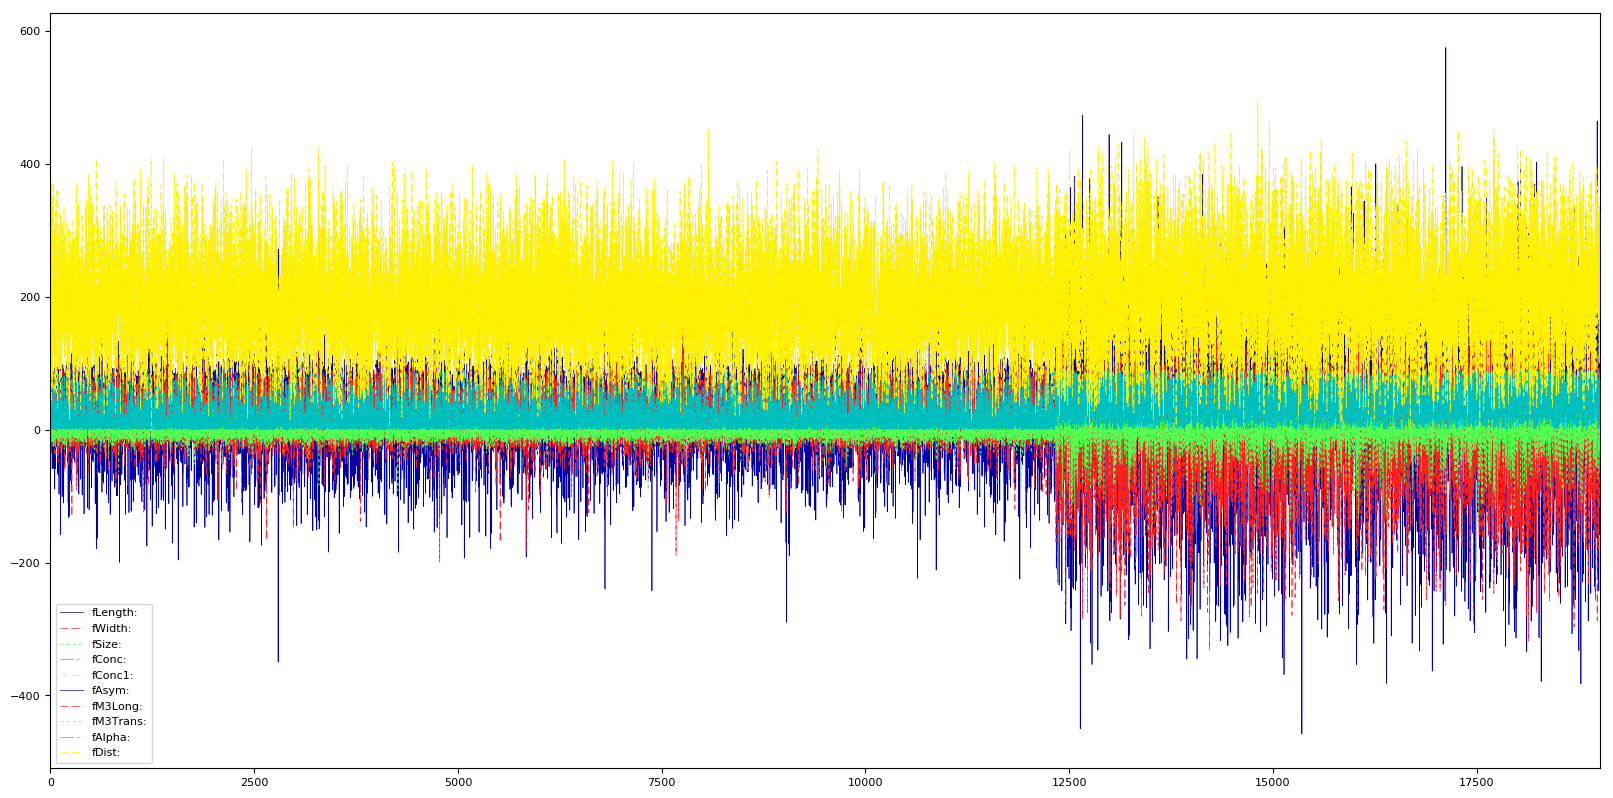

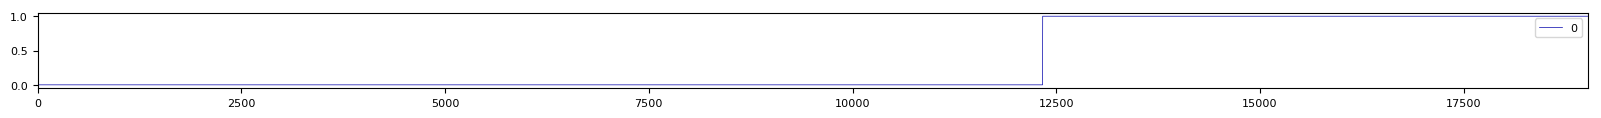

In [6]:
# Quick visualization
X, y, attribute_names = magic_data.get_data(target=magic_data.default_target_attribute, return_attribute_names=True)
magic = pd.DataFrame(X, columns=attribute_names)
magic.plot(figsize=(20,10))
# Also plot the target: 1 = gamma, 0 = background
pd.DataFrame(y).plot(figsize=(20,1));

1 . Do a bias-variance analysis of both algorithms. For each, vary the number of trees on a log scale from 1 to 1024, and plot the bias error (squared), variance, and total error (in one plot per algorithm). Interpret the results. Which error is highest for small ensembles, and which reduced most by each algorithm as you use a larger ensemble? When are both algorithms under- or overfitting? Provide a detailed explanation of why random forests and gradient boosting behave this way.
- See lecture 3 for an example on how to do the bias-variance decomposition
- To save time, you can use a 10% stratified subsample in your initial experiments, but show the plots for the full dataset in your report.

2 . A _validation curve_ can help you understand when a model starts under- or overfitting. It plots both training and test set error as you change certain characteristics of your model, e.g. one or more hyperparameters. Build validation curves for gradient boosting, evaluated using AUROC, by varying the number of iterations between 1 and 500. In addition, use at least two values for the learning rate (e.g. 0.1 and 1), and tree depth (e.g. 1 and 4). This will yield at least 4 curves. Interpret the results and provide a clear explanation for the results. When is the model over- or underfitting? Discuss the effect of the different combinations learning rate and tree depth and provide a clear explanation.
- While scikit-learn has a `validation_curve` function, we'll use a modified version (below) that provides a lot more detail and can be used to study more than one hyperparameter. You can use a default train-test split.

Q1

In [4]:
# Plots validation curves for every classifier in clfs. 
# Also indicates the optimal result by a vertical line
# Uses 1-AUROC, so lower is better
def validation_curve(clfs, X_test, y_test, X_train, y_train):
    for n,clf in enumerate(clfs):
        test_score = np.empty(len(clf.estimators_))
        train_score = np.empty(len(clf.estimators_))

        for i, pred in enumerate(clf.staged_decision_function(X_test)):
            test_score[i] = 1-roc_auc_score(y_test, pred)

        for i, pred in enumerate(clf.staged_decision_function(X_train)):
            train_score[i] = 1-roc_auc_score(y_train, pred)

        best_iter = np.argmin(test_score)
        learn = clf.get_params()['learning_rate']
        depth = clf.get_params()['max_depth']
        test_line = plt.plot(test_score,
                             label='learn=%.1f depth=%i (%.2f)'%(learn,depth,
                                                                 test_score[best_iter]))

        colour = test_line[-1].get_color()
        plt.plot(train_score, '--', color=colour)
        
        plt.xlabel("Number of boosting iterations")
        plt.ylabel("1 - area under ROC")
        plt.axvline(x=best_iter, color=colour)
        
    plt.legend(loc='best')

In [ ]:
define classifer and vary range
n_est = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

forest = list()
gbrt = list()
for n in n_est:
      forest.append(RandomForestClassifier(n_estimators=n, random_state=0, n_jobs=-1, verbose=10)) 
      gbrt.append(GradientBoostingClassifier(n_estimators=n, random_state=0, verbose=10))

In [ ]:
from sklearn.model_selection import ShuffleSplit
n_repeat = 100
shuffle_split = ShuffleSplit(test_size=0.33, n_splits=n_repeat)

# Store sample predictions
y_all_pred_forest = [[] for _ in range(len(y))]
y_all_pred_gbrt = [[] for _ in range(len(y))]


for ind, _ in enumerate(forest):
    # Train classifier on each bootstrap and score predictions
    for i, (train_index, test_index) in enumerate(shuffle_split.split(X)):
        # Train and predict
        forest[ind].fit(X[train_index], y[train_index])
        y_pred_forest = forest[ind].predict(X[test_index])
        gbrt[ind].fit(X[train_index], y[train_index])
        y_pred_gbrt = gbrt[ind].predict(X[test_index])

        # Store predictions
        for i,index in enumerate(test_index):
            y_all_pred_forest[index].append(y_pred_forest[i])
            y_all_pred_gbrt[index].append(y_pred_forest[i])
            

In [ ]:
# Compute bias, variance, error
bias_sq_forest = sum([ (1 - x.count(y[i])/len(x))**2 * len(x)/n_repeat
            for i,x in enumerate(y_all_pred_forest[index])])
var_forest = sum([((1 - ((x.count(0)/len(x))**2 + (x.count(1)/len(x))**2))/2) * len(x)/n_repeat
           for i,x in enumerate(y_all_pred_forest[index])])
error_forest = sum([ (1 - x.count(y[i])/len(x)) * len(x)/n_repeat
            for i,x in enumerate(y_all_pred_forest[index])])


bias_sq_gbrt = sum([ (1 - x.count(y[i])/len(x))**2 * len(x)/n_repeat
            for i,x in enumerate(y_all_pred_gbrt[index])])
var_gbrt = sum([((1 - ((x.count(0)/len(x))**2 + (x.count(1)/len(x))**2))/2) * len(x)/n_repeat
           for i,x in enumerate(y_all_pred_gbrt[index])])
error_gbrt = sum([ (1 - x.count(y[i])/len(x)) * len(x)/n_repeat
            for i,x in enumerate(y_all_pred_gbrt[index])])

In [ ]:
plt.style.use('seaborn')
p1 = plt.scatter(n_est, bias_sq_forest, marker='o', color='green', s=15)
p2 = plt.scatter(n_est, var_forest, marker='x', color='blue', s=15)
p3 = plt.scatter(n_est, error_forest, marker='v', color='yellow', s=15)
plt.xscale('log', basex=2)
plt.legend((p1, p2, p3),("Bias Error", "Variance", "Total Error"),scatterpoints=1, fontsize = 8)
plt.xlabel("log(n_estimators)", fontsize=10, color = 'black')
plt.ylabel("Value", fontsize=10, color = 'black')
plt.title("Bias, Variance and Total error of RandomForest",
          fontsize=16)
plt.show()

Q2

In [ ]:
# Plots validation curves for every classifier in clfs. 
# Also indicates the optimal result by a vertical line
# Uses 1-AUROC, so lower is better
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0);

def validation_curve(clfs, X_test, y_test, X_train, y_train):
    for n,clf in enumerate(clfs):
        test_score = np.empty(len(clf.estimators_))
        train_score = np.empty(len(clf.estimators_))

        for i, pred in enumerate(clf.staged_decision_function(X_test)):
            test_score[i] = 1-roc_auc_score(y_test, pred)

        for i, pred in enumerate(clf.staged_decision_function(X_train)):
            train_score[i] = 1-roc_auc_score(y_train, pred)

        best_iter = np.argmin(test_score)
        learn = clf.get_params()['learning_rate']
        depth = clf.get_params()['max_depth']
        test_line = plt.plot(test_score,
                             label='learn=%.1f depth=%i (%.2f)'%(learn,depth,
                                                                 test_score[best_iter]))

        colour = test_line[-1].get_color()
        plt.plot(train_score, '--', color=colour)
        
        plt.xlabel("Number of boosting iterations")
        plt.ylabel("1 - area under ROC")
        plt.axvline(x=best_iter, color=colour)
        
    plt.legend(loc='best')
validation_curve(clfs, X_test, y_test, X_train, y_train)
clfs = []
params = ((1.,1), (1.,4),
          (0.1,1), (0.1,4))
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0);
for learn,depth in params:
    gbt_clf = GradientBoostingClassifier(max_depth=depth,
                                         learning_rate=learn,
                                         n_estimators=500)
    gbt_clf.fit(X_train, y_train)
    clfs.append(gbt_clf)